<a href="https://colab.research.google.com/github/aminaAK/Hakaton/blob/main/a_bit_of_preprocessing_and_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import warnings

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=11FYEY4cKrrAmb5wYo1rGQsrI6zBULzRB' -O 'Исторические совершенные закупки товаров.csv'

--2024-10-14 18:34:01--  https://docs.google.com/uc?export=download&id=11FYEY4cKrrAmb5wYo1rGQsrI6zBULzRB
Resolving docs.google.com (docs.google.com)... 173.194.212.113, 173.194.212.100, 173.194.212.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=11FYEY4cKrrAmb5wYo1rGQsrI6zBULzRB&export=download [following]
--2024-10-14 18:34:01--  https://drive.usercontent.google.com/download?id=11FYEY4cKrrAmb5wYo1rGQsrI6zBULzRB&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12433096 (12M) [application/octet-stream]
Saving to: ‘Исторические совершенные закупки товаров.csv’

Исторические соверш 100%[========

In [ ]:
!wget 'https://docs.google.com/uc?export=download&id=1ZwocuAkpq9cpFbfmH2Id7v3zgJksbbPY' -O 'Исторические данные по офертам поставщиков на лот.csv'

--2024-10-14 18:34:06--  https://docs.google.com/uc?export=download&id=1ZwocuAkpq9cpFbfmH2Id7v3zgJksbbPY
Resolving docs.google.com (docs.google.com)... 173.194.212.113, 173.194.212.100, 173.194.212.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.212.113|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZwocuAkpq9cpFbfmH2Id7v3zgJksbbPY&export=download [following]
--2024-10-14 18:34:06--  https://drive.usercontent.google.com/download?id=1ZwocuAkpq9cpFbfmH2Id7v3zgJksbbPY&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 173.194.210.132, 2607:f8b0:400c:c0f::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|173.194.210.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71944140 (69M) [application/octet-stream]
Saving to: ‘Исторические данные по офертам поставщиков на лот.csv’

Исторические данные 100%

#Функция для описания

In [ ]:
def my_description(df, column_name):
  '''печатает кол-во уникальных элементов, их значения, кол-во нулей и пропусков в столбце'''
  print(f"Столбец {column_name}")
  print(f"Всего {df[column_name].count()} элементов")
  print(f"Количество уникальных элементов столбца : \
  {len(df[column_name].unique())}")
  if len(df[column_name].unique()) > 50:
    print(f"Перечень уникальных элементов столбца: [\
{df[column_name].unique()[1]} {df[column_name].unique()[2]} ... \
{df[column_name].unique()[-1]} {df[column_name].unique()[-2]}]")
  else:
    print(f"Перечень уникальных элементов столбца : {df[column_name].unique()}")
  if df[column_name].isnull().values.sum() == 0:
    print(f"Пропусков в данных нет")
  else:
    print(f"Кол-во пропусков в данных: {df[column_name].isnull().values.sum()}")
  if df[df[column_name] == 0][column_name].count() == 0:
    print(f"Нулевых значений в данных нет")
  else:
    print(f"Нулевые значения в данных есть: \
{df[df[column_name] == 0][column_name].count()} шт.")

#**Исторические совершенные закупки товаров**

##ОПИСАНИЕ СТОЛБЦОВ

* '**Заявка на закупку**' - № заявки
* '**Позиц.**'

В одной заявке может быть одна или несколько строка, с разными материалами. Как правило, материалы схожы (провод и провод и тд), но с разными характеристиками (напр, провода разного диаметра).

В одну позицию могут входить достаточно разные заявки, не поняла, по какому принципу

Пропусков и нулей нет (в обоих столбцах)

---

* '**Статус плана МТО**' (обозначение статуса)
* '**Текст статуса плана МТО**'

Соответствуют друг другу

Есть всего 6 статусов: ['Проработано с поставщиком', 'Создан запрос', 'Утверждено/не проработано', 'Предварительно готов', 'Конкурс', Без статуса']

Пропусков и нулей нет (в обоих)

---

* '**Материал**' (номер)
* '**Материал Имя**'

'Материалов Имя' меньше, чем номеров материалов.

Пропусков и нулей нет (в обоих)

---

* '**Базисная ЕИ**
* '**АЕИ заказа**'

Эти 2 полностью совпадают, единицы измерения (метры для кабелей, штуки для плёнок и т.д.).

Пропусков и нулей нет

---

* '**Кол-во к закупу, БЕИ**'
* '**Кол-во к закупу, АЕИ**'

Эти 2 полностью совпадают, обозначают количество (в единицах измерения). Не обязательно целое число, может быть дробное число метров, например.

Пропусков и нулей нет

---

* '**Срок поставки**'
* '**Дата заявки**'

Пропусков и нулей нет. Формат даты.

---

* '**План.цена с НДС**'
* '**Пл.цена с НДС за АЕИ**'
* '**План.сумма с НДС 20%**'
'План.цена с НДС' и 'Пл.цена с НДС за АЕИ' полностью совпадают

'План.сумма с НДС 20%' ~='Кол-во к закупу, БЕИ'*'Пл.цена с НДС за АЕИ', но есть небольшие несоответствия! В основном это округления в большую/меньшую сторону, но у индексов 15921 и 38580 различия больше 100

Пропусков и нулей нет (во всех трёх)

---

* '**Цена поставки с НДС**'

Итоговая цена заявки. (То, сколько клиент заплатил поставщику.) Как правило, меньше, чем планируемая сумма. Много 0, т.к. много заявок, не доведённых до конца.
**Здесь нули - треть данных (~13000 из ~39000)**

Можно смотреть корреляцию с гпз способ закупки

Пропусков нет, нули есть

---

* '**Валюта**'

В данной таблице только два варианта валюты - ['RUB', 'USD'], пропусков нет.

Нулей нет

---

* '**Поставщик**'

Пропуски соответствуют пропускам в столбце 'Цена поставки с НДС'. Треть данных - пропуски.

Нулей нет

---

* '**Код класса МТР**'
* '**Наим.Код кл.**'

Всего 37 классов, наименование соответствует коду. Пропусков нет, нулей нет. Код в формате G21{ещё цифры}.

---

* '**ID лота**'

всего 4236 лотов, 9067 пропусков (это почти треть датасета).
Нулей нет

---

* '**Грузополучатель**'

272 уникальных элемента, 3 пропуска, нулей нет

* '**Клиент**'

47 уникальных элементов, нулей нет, 5 пропусков

Каждому клиенту соответствует один или несколько грузополучателей. При этом один и тот же грузополучатель может соответствовать нескольким клиентам (странно). Соответствие Клиент - Грузополучатель можно посмотреть во вкладке Грузополучатель и Клиент этого документа.

---

* '**ГПЗ Способ закупки**'

7 уникальных элементов, 14277 пропусков, нулей нет

Соответствие со стообцом Цена поставки с НДС: способам Аукцион и Запрос котировок соответствуют только нулевые цены.

Убрать из рассмотрения покупки в валюте, возможно, отдельно также посмотреть на иностранных кредиторов

In [ ]:
df1 = pd.read_csv('Исторические совершенные закупки товаров.csv')

In [ ]:
df1.head()

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
0,10928585,30,P4,Проработано с поставщиком,770000818063,Кабель FYO2RMU 2х4х4хSML 90756м Nestor,ШТ,ШТ,2.000,2.000,...,13097296.44,6548648.22,RUB,55019.0,G2109,Кабели волоконно-оптические,1.000003e+11,20000447.0,39295.0,NaN
1,10928863,50,P5,Создан запрос,770000594878,"Кабель ИнСил-ОЭвзнг(А)-ХЛ 4х2х1,0-660",КМ,КМ,0.695,0.695,...,479687.14,622498.09,RUB,72148.0,G2106,Кабели монтажные и управления,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
2,10928863,60,P5,Создан запрос,770000831667,"Кабель К9РВСБПМнг(А)-HF 4х1,5ок(N)-1",КМ,КМ,0.320,0.320,...,142496.92,149508.00,RUB,54948.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
3,10929730,210,P5,Создан запрос,770000869461,"Провод ПуВнг(А)-LS 1х1,0 (PE)",КМ,КМ,0.030,0.030,...,34092.00,9800.67,RUB,58691.0,G210511,Провода силовые,1.000003e+11,20000537.0,57650.0,Конкурентный отбор
4,10929730,220,P5,Создан запрос,770000869463,"Провод ПуГВнг(А)-LS 1х6,0 (PE)",КМ,КМ,0.030,0.030,...,36000.00,49400.00,RUB,58691.0,G210511,Провода силовые,1.000003e+11,20000537.0,57650.0,Конкурентный отбор


In [ ]:
col1 = df1.columns
col1

Index(['Заявка на закупку', 'Позиц.', 'Статус плана МТО',
       'Текст статуса плана МТО', 'Материал', 'Материал Имя', 'Базисная ЕИ',
       'АЕИ заказа', 'Кол-во к закупу, БЕИ', 'Кол-во к закупу, АЕИ',
       'Срок поставки', 'Дата заявки', 'План.цена с НДС',
       'Пл.цена с НДС за АЕИ', 'План.сумма с НДС 20%', 'Цена поставки с НДС',
       'Валюта', 'Поставщик', 'Код класса МТР', 'Наим.Код кл.', 'ID лота',
       'Грузополучатель', 'Клиент', 'ГПЗ Способ закупки'],
      dtype='object')

In [ ]:
for name in df1.columns:
  my_description(df1, name)
  print('-------------------------------\n')

Столбец Заявка на закупку
Всего 39530 элементов
Количество уникальных элементов столбца :   6593
Перечень уникальных элементов столбца: [10928863 10929730 ... 11625929 11625868]
Пропусков в данных нет
Нулевых значений в данных нет
-------------------------------

Столбец Позиц.
Всего 39530 элементов
Количество уникальных элементов столбца :   1791
Перечень уникальных элементов столбца: [50 60 ... 7570 10260]
Пропусков в данных нет
Нулевых значений в данных нет
-------------------------------

Столбец Статус плана МТО
Всего 39530 элементов
Количество уникальных элементов столбца :   6
Перечень уникальных элементов столбца : ['P4' 'P5' 'P2' 'P1' 'P3' 'P0']
Пропусков в данных нет
Нулевых значений в данных нет
-------------------------------

Столбец Текст статуса плана МТО
Всего 39530 элементов
Количество уникальных элементов столбца :   6
Перечень уникальных элементов столбца : ['Проработано с поставщиком' 'Создан запрос' 'Утверждено/не проработано'
 'Предварительно готов' 'Конкурс' 'Без

In [ ]:
df1.drop_duplicates().index.size

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


39530

In [ ]:
df1[df1['Заявка на закупку'] == df1['Заявка на закупку'][1]]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
1,10928863,50,P5,Создан запрос,770000594878,"Кабель ИнСил-ОЭвзнг(А)-ХЛ 4х2х1,0-660",КМ,КМ,0.695,0.695,...,479687.14,622498.09,RUB,72148.0,G2106,Кабели монтажные и управления,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
2,10928863,60,P5,Создан запрос,770000831667,"Кабель К9РВСБПМнг(А)-HF 4х1,5ок(N)-1",КМ,КМ,0.320,0.320,...,142496.92,149508.00,RUB,54948.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20001383.0,64025.0,Конкурентный отбор


In [ ]:
df1.groupby(['Заявка на закупку'])['Материал Имя'].unique()

,Материал Имя
Заявка на закупку,
10928585,[Кабель FYO2RMU 2х4х4хSML 90756м Nestor]
10928863,"[Кабель ИнСил-ОЭвзнг(А)-ХЛ 4х2х1,0-660, Кабель..."
10929730,"[Провод ПуВнг(А)-LS 1х1,0 (PE), Провод ПуГВнг(..."
10929832,"[Кабель КВВГЭнг(А)-LS 4х1, Кабель КВВГЭнг(А)-L..."
10929834,"[Кабель КВБбШвнг(А)-LS 4х1,5, Кабель КВЭБбШвнг..."
...,...
11624364,"[Кабель КВБбШвнг(А)-ХЛ 4х1,5, Кабель ВБШвнг(А)..."
11624676,[Провод ПуГВ-ХЛ 1х6 з-ж]
11625397,[Провод ПуГВнг(А)-LS 1х25 з-ж]


In [ ]:
df1[df1['Заявка на закупку'] == 10928863]

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
1,10928863,50,P5,Создан запрос,770000594878,"Кабель ИнСил-ОЭвзнг(А)-ХЛ 4х2х1,0-660",КМ,КМ,0.695,0.695,...,479687.14,622498.09,RUB,72148.0,G2106,Кабели монтажные и управления,1.000004e+11,20001383.0,64025.0,Конкурентный отбор
2,10928863,60,P5,Создан запрос,770000831667,"Кабель К9РВСБПМнг(А)-HF 4х1,5ок(N)-1",КМ,КМ,0.320,0.320,...,142496.92,149508.00,RUB,54948.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20001383.0,64025.0,Конкурентный отбор


##Заявка на закупку

In [ ]:
len(df1['Заявка на закупку'].unique())

6593

In [ ]:
len(df1['Позиц.'].unique())

1791

##Статус и текст плана МТО:

In [ ]:
print(f"Возможные значения колонки 'Статус плана МТО': \
{df1['Статус плана МТО'].unique()}\n\
Возможные значения колонки 'Текст статуса плана МТО': \
{df1['Текст статуса плана МТО'].unique()}\n")
if len(df1['Статус плана МТО'].unique()) == len(df1['Текст статуса плана МТО'].unique()):
  print('КОЛОНКИ СООТВЕТСТВУЮТ')
else:
  print('КОЛОНКИ НЕ СООТВЕТСТВУЮТ')

Возможные значения колонки 'Статус плана МТО': ['P4' 'P5' 'P2' 'P1' 'P3' 'P0']
Возможные значения колонки 'Текст статуса плана МТО': ['Проработано с поставщиком' 'Создан запрос' 'Утверждено/не проработано'
 'Предварительно готов' 'Конкурс' 'Без статуса']

КОЛОНКИ СООТВЕТСТВУЮТ


In [ ]:
dict_mto = {'P4' : 'Проработано с поставщиком', 'P5' : 'Создан запрос',
            'P2' : 'Утверждено/не проработано', 'P1' : 'Предварительно готов',
            'P3' : 'Конкурс', 'P0': 'Без статуса'}

In [ ]:
for i in df1.index:
  if df1['Текст статуса плана МТО'][i] != dict_mto[df1['Статус плана МТО'][i]]:
    print(df1[i])

КОЛОНКИ СООТВЕТСТВУЮТ

##Материалы

In [ ]:
print(f"\
Возможных значений 'Материал' {len(df1['Материал'].unique())}\n\
Возможных значений 'Материал Имя' {len(df1['Материал Имя'].unique())}\n")
if len(df1['Материал'].unique()) == len(df1['Материал Имя'].unique()):
  print('КОЛОНКИ СООТВЕТСТВУЮТ')
else:
  print('КОЛОНКИ НЕ СООТВЕТСТВУЮТ')

Возможных значений 'Материал' 13085
Возможных значений 'Материал Имя' 10858

КОЛОНКИ НЕ СООТВЕТСТВУЮТ


##ЕИ

In [ ]:
df1[df1['Базисная ЕИ'] != df1['АЕИ заказа']]

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки


КОЛОНКИ Базисная ЕИ И АЕИ заказа полностью совпадают

##Кол-во к закупу, БЕИ и Кол-во к закупу, АЕИ

In [ ]:
df1[df1['Кол-во к закупу, БЕИ'] != df1['Кол-во к закупу, АЕИ']]

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки


КОЛОНКИ 'Кол-во к закупу, БЕИ' И 'Кол-во к закупу, АЕИ' полностью совпадают

##'План.цена с НДС' 'Пл.цена с НДС за АЕИ' 'План.сумма с НДС 20%'

In [ ]:
df1[['Кол-во к закупу, БЕИ', 'План.цена с НДС', 'Пл.цена с НДС за АЕИ', 'План.сумма с НДС 20%']].sample(10)

,"Кол-во к закупу, БЕИ",План.цена с НДС,Пл.цена с НДС за АЕИ,План.сумма с НДС 20%
11006,0.12,1880984.17,1880984.17,225718.10
31577,1.10,230000.82,230000.82,253000.91
13976,0.20,111866.04,111866.04,22373.21
31740,0.30,296026.96,296026.96,88808.09
36302,2.00,1.20,1.20,2.40
22390,0.93,329668.09,329668.09,306591.32
23895,0.50,234781.13,234781.13,117390.56
23415,25.00,6000.00,6000.00,150000.00
5506,300.00,1.04,1.04,313.20
36947,30.00,519.60,519.60,15588.00


In [ ]:
df1[df1['План.цена с НДС'] != df1['Пл.цена с НДС за АЕИ']]

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки


In [ ]:
round(df1['Пл.цена с НДС за АЕИ'][7] * df1['Кол-во к закупу, БЕИ'][7], 2)

697349.43

In [ ]:
df1[df1['План.сумма с НДС 20%'] != (df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ'])][[
                                        'Кол-во к закупу, БЕИ',
                                       'План.цена с НДС',
                                       'Пл.цена с НДС за АЕИ',
                                       'План.сумма с НДС 20%']]

,"Кол-во к закупу, БЕИ",План.цена с НДС,Пл.цена с НДС за АЕИ,План.сумма с НДС 20%
1,0.695,690197.32,690197.32,479687.14
2,0.320,445302.88,445302.88,142496.92
7,0.585,1192050.30,1192050.30,697349.42
9,2.958,2093488.20,2093488.20,6192538.09
10,2.180,1655694.53,1655694.53,3609414.07
...,...,...,...,...
39521,3.134,266344.80,266344.80,834724.61
39522,3.249,2089936.80,2089936.80,6790204.67
39523,0.524,220332.01,220332.01,115453.98
39524,0.420,190954.40,190954.40,80200.85


In [ ]:
df1[df1['План.сумма с НДС 20%'] != (df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ'])][[
                                        'Кол-во к закупу, БЕИ',
                                       'План.цена с НДС',
                                       'Пл.цена с НДС за АЕИ',
                                       'План.сумма с НДС 20%']]

,"Кол-во к закупу, БЕИ",План.цена с НДС,Пл.цена с НДС за АЕИ,План.сумма с НДС 20%
1,0.695,690197.32,690197.32,479687.14
2,0.320,445302.88,445302.88,142496.92
7,0.585,1192050.30,1192050.30,697349.42
9,2.958,2093488.20,2093488.20,6192538.09
10,2.180,1655694.53,1655694.53,3609414.07
...,...,...,...,...
39521,3.134,266344.80,266344.80,834724.61
39522,3.249,2089936.80,2089936.80,6790204.67
39523,0.524,220332.01,220332.01,115453.98
39524,0.420,190954.40,190954.40,80200.85


In [ ]:
df1[~((df1['План.сумма с НДС 20%'] == (df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ'])) |
     (df1['План.сумма с НДС 20%'] == round(df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ'], 2)) |
    (df1['План.сумма с НДС 20%'] == round(df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ'], 2) - 0.01))][[
                                        'Кол-во к закупу, БЕИ',
                                       'План.цена с НДС',
                                       'Пл.цена с НДС за АЕИ',
                                       'План.сумма с НДС 20%']]

,"Кол-во к закупу, БЕИ",План.цена с НДС,Пл.цена с НДС за АЕИ,План.сумма с НДС 20%
10,2.180,1655694.53,1655694.53,3609414.07
24,7.665,822815.45,822815.45,6306880.40
28,3.630,1081536.37,1081536.37,3925977.04
30,2.290,323285.62,323285.62,740324.06
38,215.000,2679.64,2679.64,576121.74
...,...,...,...,...
39503,0.344,196021.87,196021.87,67431.53
39517,36.000,239.26,239.26,8613.22
39521,3.134,266344.80,266344.80,834724.61
39522,3.249,2089936.80,2089936.80,6790204.67


In [ ]:
df1[abs(df1['План.сумма с НДС 20%'] - df1['Пл.цена с НДС за АЕИ'] *
                                    df1['Кол-во к закупу, БЕИ']) > 100][[
                                        'Кол-во к закупу, БЕИ',
                                       'План.цена с НДС',
                                       'Пл.цена с НДС за АЕИ',
                                       'План.сумма с НДС 20%']]

,"Кол-во к закупу, БЕИ",План.цена с НДС,Пл.цена с НДС за АЕИ,План.сумма с НДС 20%
15921,26000.0,226720.00,226720.00,5.894720e+09
38580,26523.0,763.88,763.88,2.026050e+07


'План.цена с НДС' и 'Пл.цена с НДС за АЕИ' полностью совпадают

'План.сумма с НДС 20%' ~='Кол-во к закупу, БЕИ'*'Пл.цена с НДС за АЕИ', но есть небольшие несоответствия! В основном это округления в большую/меньшую сторону, но у индексов 15921 и 38580 различия больше 100

##'Цена поставки с НДС'

In [ ]:
df1['Цена поставки с НДС'].sample(10)

,Цена поставки с НДС
37827,0.00
37892,0.00
1127,80640.00
23066,0.77
27617,0.00
9895,643.71
13552,0.00
39468,0.00
10913,0.00
31793,284894.81


Text(0.5, 1.0, 'Цена с НДС')

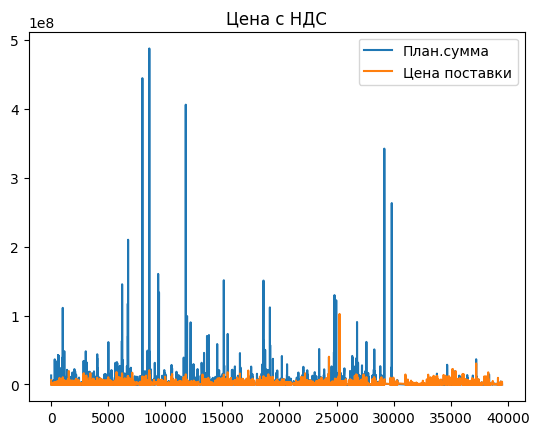

In [ ]:
plt.plot(df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)].index,
         df1[(df1['План.сумма с НДС 20%']<2000000000)
             & (df1['Цена поставки с НДС'] > 0)]['План.сумма с НДС 20%'],
         label = 'План.сумма')
plt.plot(df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)].index,
         df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)]['Цена поставки с НДС'],
         label = 'Цена поставки')
plt.legend()
plt.title('Цена с НДС')

In [ ]:
df1[df1['Цена поставки с НДС'] == 0]['Цена поставки с НДС'].count()

13666

In [ ]:
df1['Цена поставки с НДС'].count()

39530

##Валюта

In [ ]:
df1['Валюта'].unique()

array(['RUB', 'USD'], dtype=object)

In [ ]:
df1[df1['Валюта'] == 'USD']['Валюта'].count()

71

In [ ]:
df1['Валюта'].isnull().sum()

0

В данной таблице только два варианта валюты - ['RUB', 'USD'], пропусков нет.

In [ ]:
df1_processed = df1[df1['Валюта'] == 'RUB']

In [ ]:
df1_processed['Валюта'].unique()

array(['RUB'], dtype=object)

In [ ]:
df1_processed.to_csv('df1_processed')

##Код класса МТР И Наим.Код кл.

In [ ]:
my_description(df1, 'Код класса МТР')

Столбец Код класса МТР
Всего 39530 элементов
Количество уникальных элементов столбца :   37
Перечень уникальных элементов столбца : ['G2109' 'G2106' 'G21050101' 'G210511' 'G210502' 'G21050301' 'G2104'
 'G210402' 'G210516' 'G21050102' 'G210512' 'G210504' 'G21050370' 'G2110'
 'G210505' 'G2107' 'G21050103' 'G21040101' 'G210470' 'G2170' 'G210404'
 'G210509' 'G210507' 'G210514' 'G21050104' 'G21050302' 'G210508' 'G210506'
 'G210403' 'G21040102' 'G2111' 'G210513' 'G2108' 'G2114' 'G210510' 'G2160'
 'G210515']
Пропусков в данных нет
Нулевых значений в данных нет


In [ ]:
my_description(df1, 'Наим.Код кл.')

Столбец Наим.Код кл.
Всего 39530 элементов
Количество уникальных элементов столбца :   37
Перечень уникальных элементов столбца : ['Кабели волоконно-оптические' 'Кабели монтажные и управления'
 'Кабели силовые с изоляцией из ЭПР' 'Провода силовые'
 'Кабели контрольные' 'Витая пара' 'АРМАТУРА КАБЕЛЬНАЯ'
 'Наконечники кабельные' 'Провода самонесущие изолированные'
 'Кабели силовые с изоляцией из ПВХ' 'Провода неизолированные'
 'Кабели сигнально-блокировочные' 'Кабели связи прочие' 'Кабели греющие'
 'Кабели гибкие' 'Кабели нефтепогружные'
 'Кабели силовые с изоляцией из СП'
 'Муфты для силовых и контрольных кабелей' 'Арматура кабельная прочая'
 'ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ'
 'Комплектующие к арматуре кабельной' 'Провода радио и связи'
 'Кабели судовые' 'Провода и кабели термост., термоэлектр.'
 'Кабели силовые с бумажной изоляцией' 'Кабели телефонные'
 'Провода кроссировочные' 'Кабели радиочастотные' 'Гильзы кабельные'
 'Муфты для оптических кабелей' 'Кабели пневматические и пн

Код и наименование совпадают

##ID лота

In [ ]:
my_description(df1, 'ID лота')

Столбец ID лота
Всего 30463 элементов
Количество уникальных элементов столбца :   4236
Перечень уникальных элементов столбца: [100000351760.0 100000357071.0 ... 100000753761.0 100000760018.0]
Кол-во пропусков в данных: 9067
Нулевых значений в данных нет


##Грузополучатель и Клиент

In [ ]:
my_description(df1, 'Грузополучатель')

Столбец Грузополучатель
Всего 39527 элементов
Количество уникальных элементов столбца :   272
Перечень уникальных элементов столбца: [20001383.0 20000537.0 ... 20003178.0 20003185.0]
Кол-во пропусков в данных: 3
Нулевых значений в данных нет


In [ ]:
my_description(df1, 'Клиент')

Столбец Клиент
Всего 39525 элементов
Количество уникальных элементов столбца :   57
Перечень уникальных элементов столбца: [64025.0 57650.0 ... 23908.0 97819.0]
Кол-во пропусков в данных: 5
Нулевых значений в данных нет


In [ ]:
df1[df1['Грузополучатель'] == 20001383.0].index

Index([    1,     2,   727,   728,   729,   730,   731,   732,   733,   734,
       ...
       39462, 39463, 39464, 39465, 39466, 39467, 39468, 39469, 39470, 39471],
      dtype='int64', length=207)

In [ ]:
df1[df1['Клиент'] == df1['Клиент'][1]].index

Index([    1,     2,    51,   727,   728,   729,   730,   731,   732,   733,
       ...
       39462, 39463, 39464, 39465, 39466, 39467, 39468, 39469, 39470, 39471],
      dtype='int64', length=3670)

In [ ]:
type(df1.groupby('Клиент')['Грузополучатель'].unique())

pandas.core.series.Series

In [ ]:
df1.groupby('Клиент')['Грузополучатель'].unique().head()

,Грузополучатель
Клиент,
59.0,"[20000221.0, 20000222.0]"
8536.0,"[8536.0, 20000052.0, 20000098.0]"
8602.0,"[20000908.0, 20001874.0, 8602.0]"
15667.0,[20002148.0]
19589.0,[20000272.0]


In [ ]:
warnings.filterwarnings('ignore')
df111 = pd.DataFrame([df1.groupby('Клиент')['Грузополучатель'].unique()]).transpose()
df111['Кол-во грузополучателей'] = 0
for i in df111.index:
  df111['Кол-во грузополучателей'][i] = len(df111['Грузополучатель'][i])
df111.sample(5)
warnings.filterwarnings('default')

In [ ]:
df111['Кол-во грузополучателей'].sum()

282

А всего кол-во уникальных грузополучателей 272, то есть, у некоторых клиентов сопадают грузополучатели.

In [ ]:
print('Таблица соответствия Клиент - Грузополучатель')
print(df1.groupby('Клиент')['Грузополучатель'].unique())

Таблица соответствия Клиент - Грузополучатель
Клиент
59.0                                 [20000221.0, 20000222.0]
8536.0                       [8536.0, 20000052.0, 20000098.0]
8602.0                       [20000908.0, 20001874.0, 8602.0]
15667.0                                          [20002148.0]
19589.0                                          [20000272.0]
23908.0                                          [20001888.0]
24446.0                                 [24446.0, 20000128.0]
26250.0                              [20002276.0, 20002275.0]
27605.0                     [20001013.0, 27605.0, 20000770.0]
27644.0                                          [20002163.0]
27645.0     [20001633.0, 20000511.0, 20000286.0, 20000584....
37846.0     [20000843.0, 20001873.0, 20001860.0, 20001818....
38632.0                     [38632.0, 20000187.0, 20002530.0]
39232.0     [20001585.0, 20002695.0, 20002691.0, 20002694....
39285.0     [20002019.0, 20002024.0, 20002020.0, 20002021....
39295.0     [2000

##ГПЗ Способ закупки

In [ ]:
my_description(df1, 'ГПЗ Способ закупки')

Столбец ГПЗ Способ закупки
Всего 25253 элементов
Количество уникальных элементов столбца :   7
Перечень уникальных элементов столбца : [nan 'Конкурентный отбор' 'Прочие закупки' 'Маркетинговые исследования'
 'Закупка у единственного поставщика' 'Запрос котировок' 'Аукцион']
Кол-во пропусков в данных: 14277
Нулевых значений в данных нет


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
df1.groupby('ГПЗ Способ закупки')['Цена поставки с НДС'].unique()

,Цена поставки с НДС
ГПЗ Способ закупки,
Аукцион,[0.0]
Закупка у единственного поставщика,"[332700.0, 1742514.97, 45240.52, 28539.2, 3045..."
Запрос котировок,[0.0]
Конкурентный отбор,"[622498.09, 149508.0, 9800.67, 49400.0, 112702..."
Маркетинговые исследования,"[0.0, 8.59, 25.82, 317.88, 10.5, 31.97, 54.28,..."
Прочие закупки,"[1541738.1, 61582.1, 93199.87, 61582.06, 52566..."


##Срок поставки, Дата заявки

In [ ]:
my_description(df1, 'Срок поставки')

Столбец Срок поставки
Всего 39530 элементов
Количество уникальных элементов столбца :   1330
Перечень уникальных элементов столбца: [2020-08-30 2020-10-10 ... 2024-08-24 2024-08-02]
Пропусков в данных нет
Нулевых значений в данных нет


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
my_description(df1, 'Дата заявки')

Столбец Дата заявки
Всего 39530 элементов
Количество уникальных элементов столбца :   1107
Перечень уникальных элементов столбца: [2020-01-07 2020-01-10 ... 2024-04-01 2024-03-29]
Пропусков в данных нет
Нулевых значений в данных нет


##Выбросы, пропуски

In [ ]:
len(df1.index)

39530

Посмотрим на пропуски в данных:

In [ ]:
for i in df1.columns:
  print(f'Кол-во null элементов в столбце {i}: \
  {df1[i].isnull().values.sum()}')

Кол-во null элементов в столбце Заявка на закупку:   0
Кол-во null элементов в столбце Позиц.:   0
Кол-во null элементов в столбце Статус плана МТО:   0
Кол-во null элементов в столбце Текст статуса плана МТО:   0
Кол-во null элементов в столбце Материал:   0
Кол-во null элементов в столбце Материал Имя:   0
Кол-во null элементов в столбце Базисная ЕИ:   0
Кол-во null элементов в столбце АЕИ заказа:   0
Кол-во null элементов в столбце Кол-во к закупу, БЕИ:   0
Кол-во null элементов в столбце Кол-во к закупу, АЕИ:   0
Кол-во null элементов в столбце Срок поставки:   0
Кол-во null элементов в столбце Дата заявки:   0
Кол-во null элементов в столбце План.цена с НДС:   0
Кол-во null элементов в столбце Пл.цена с НДС за АЕИ:   0
Кол-во null элементов в столбце План.сумма с НДС 20%:   0
Кол-во null элементов в столбце Цена поставки с НДС:   0
Кол-во null элементов в столбце Валюта:   0
Кол-во null элементов в столбце Поставщик:   13666
Кол-во null элементов в столбце Код класса МТР:   0
Кол-

Откуда пропуски в поставщике:

In [ ]:
df1[df1['Поставщик'].isnull()]['Текст статуса плана МТО'].unique()

array(['Утверждено/не проработано', 'Проработано с поставщиком',
       'Предварительно готов', 'Конкурс', 'Без статуса', 'Создан запрос'],
      dtype=object)

Подозрение, что это только не проработанные заявки - не оправдалось. Встречаются все статусы.

Зато количество совпадает с нулями в столбце 'Цена поставки с НДС'. Нет поставщика - 0 рублей

In [ ]:
df1['Поставщик'].isnull().sum()

13666

In [ ]:
df1[df1['Поставщик'].isnull()].sample(10)

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
24486,11351766,200,P2,Утверждено/не проработано,770001106238,Провод ПуВ 1х16 черный,КМ,КМ,0.030,0.030,...,6267.47,0.0,RUB,NaN,G210511,Провода силовые,NaN,20001078.0,78154.0,NaN
21077,11290072,640,P0,Без статуса,770000920700,Кабель коаксиальный RG-6,М,М,301.000,301.000,...,75234.35,0.0,RUB,NaN,G210506,Кабели радиочастотные,NaN,20001818.0,37846.0,NaN
14220,11152217,710,P0,Без статуса,770000653841,Гильза ГМл 16-6 КВТ/41303,ШТ,ШТ,50.000,50.000,...,973.20,0.0,RUB,NaN,G210403,Гильзы кабельные,NaN,20001915.0,95192.0,NaN
26905,11407940,1940,P1,Предварительно готов,770001096602,Кабель 15QTVR2-CT nVent Raychem/040615,М,М,125.000,125.000,...,150.00,0.0,RUB,NaN,G2110,Кабели греющие,NaN,20002654.0,27645.0,NaN
29345,11462278,13400,P2,Утверждено/не проработано,770001501392,"Кабель КПпБП-130 3х16-3,3",КМ,КМ,1.078,1.078,...,286779.73,0.0,RUB,NaN,G2107,Кабели нефтепогружные,NaN,20001013.0,27605.0,NaN
34025,11512225,2910,P2,Утверждено/не проработано,770001210079,Наконечник НШВИ 4.0-18 КВТ/79448,УП,УП,1.000,1.000,...,1.20,0.0,RUB,NaN,G210402,Наконечники кабельные,NaN,20002884.0,27645.0,NaN
20609,11285566,420,P4,Проработано с поставщиком,770000971210,Набор наконечников НШВИ №3 КВТ/79491,ШТ,ШТ,41.000,41.000,...,65080.78,0.0,RUB,NaN,G210402,Наконечники кабельные,1.000006e+11,20001063.0,57164.0,Конкурентный отбор
28744,11453890,980,P2,Утверждено/не проработано,770000527014,"Кабель ВВГнг(А)-LS 2х2,5ок(N)-0,66",КМ,КМ,0.002,0.002,...,156.17,0.0,RUB,NaN,G21050102,Кабели силовые с изоляцией из ПВХ,NaN,20001079.0,78154.0,Прочие закупки
30766,11479580,2700,P0,Без статуса,770000953446,Провод ПуГВ 1х6 з-ж,КМ,КМ,0.014,0.014,...,2364.10,0.0,RUB,NaN,G210511,Провода силовые,NaN,20002276.0,26250.0,NaN
9094,11086060,80,P2,Утверждено/не проработано,1154578,Кабель КВВГЭ 10х1,КМ,КМ,2.500,2.500,...,231342.00,0.0,RUB,NaN,G210502,Кабели контрольные,NaN,20002024.0,39285.0,NaN


In [ ]:
print(f"Кол-во пропусков в 'Поставщик': {df1['Поставщик'].isnull().sum()}\n\
Кол-во пропусков в 'ID лота': {df1['ID лота'].isnull().sum()}\n")

Кол-во пропусков в 'Поставщик': 13666
Кол-во пропусков в 'ID лота': 9067



То есть, у нас у трети заявок не указан поставщик!

Понятно, что остальные данные могут быть разными (цифры в ID, номерах товаров и т.д. не несут математического смысла). Выбросы могут быть в цене:

In [ ]:
df1[['План.сумма с НДС 20%', 'Цена поставки с НДС']].describe()

,План.сумма с НДС 20%,Цена поставки с НДС
count,3.953000e+04,3.953000e+04
mean,1.410966e+06,5.165787e+05
std,4.678774e+07,1.372532e+06
min,0.000000e+00,0.000000e+00
25%,7.364700e+03,0.000000e+00
50%,9.186160e+04,8.395557e+04
75%,4.802206e+05,4.472006e+05
max,6.936000e+09,1.023494e+08


<Axes: >

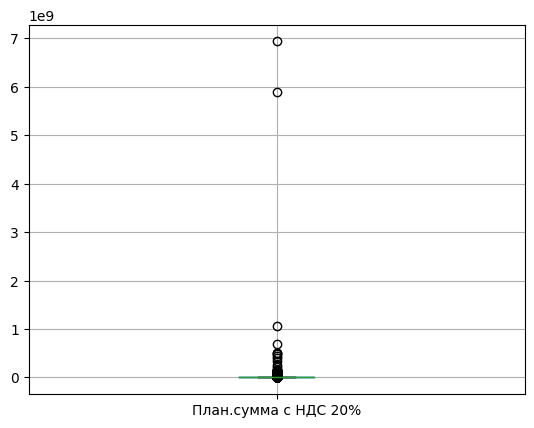

In [ ]:
df1[['План.сумма с НДС 20%']].boxplot()

<Axes: >

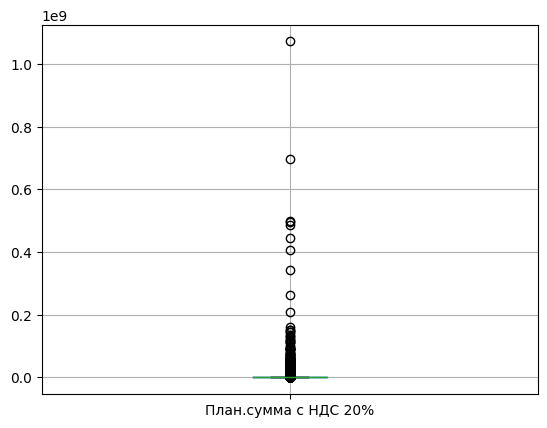

In [ ]:
df1[df1['План.сумма с НДС 20%'] < 2e9][['План.сумма с НДС 20%']].boxplot()

Text(0.5, 1.0, 'Цена с НДС')

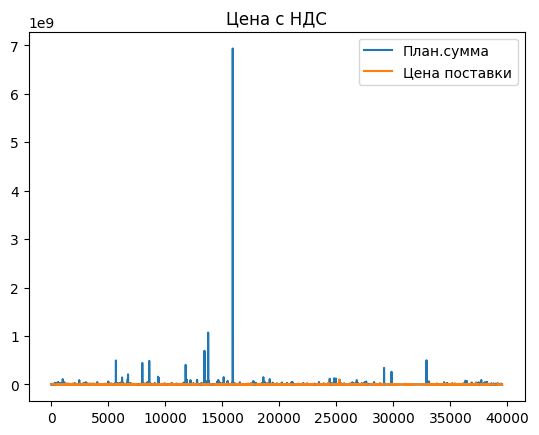

In [ ]:
plt.plot(df1.index, df1['План.сумма с НДС 20%'], label = 'План.сумма')
plt.plot(df1.index, df1['Цена поставки с НДС'], label = 'Цена поставки')
plt.legend()
plt.title('Цена с НДС')

Text(0.5, 1.0, 'Цена с НДС (без самых больших значений)')

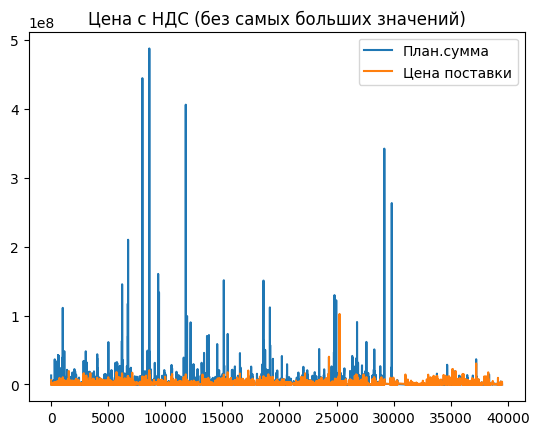

In [ ]:
plt.plot(df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)].index,
         df1[(df1['План.сумма с НДС 20%']<2000000000)
             & (df1['Цена поставки с НДС'] > 0)]['План.сумма с НДС 20%'],
         label = 'План.сумма')
plt.plot(df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)].index,
         df1[(df1['План.сумма с НДС 20%']<2000000000) &
             (df1['Цена поставки с НДС'] > 0)]['Цена поставки с НДС'],
         label = 'Цена поставки')
plt.legend()
plt.title('Цена с НДС (без самых больших значений)')

In [ ]:
df1[(df1['План.сумма с НДС 20%']>1e8)]

,Заявка на закупку,Позиц.,Статус плана МТО,Текст статуса плана МТО,Материал,Материал Имя,Базисная ЕИ,АЕИ заказа,"Кол-во к закупу, БЕИ","Кол-во к закупу, АЕИ",...,План.сумма с НДС 20%,Цена поставки с НДС,Валюта,Поставщик,Код класса МТР,Наим.Код кл.,ID лота,Грузополучатель,Клиент,ГПЗ Способ закупки
1017,10941757,2130,P5,Создан запрос,770001008862,"Кабель Вз-РэРэГнг(А)-HF-ХЛ 5х150мкN,PE-1",КМ,КМ,5.340,5.340,...,1.111753e+08,6773352.00,RUB,47772.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20001295.0,64025.0,Конкурентный отбор
5679,11030657,50,P2,Утверждено/не проработано,770000948338,Система кабельная,КТ,КТ,1.000,1.000,...,4.957348e+08,0.00,RUB,NaN,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ,NaN,20001766.0,78154.0,NaN
6218,11043596,1080,P5,Создан запрос,770001068696,"Кабель ИнСилРэпПнг(А-HF-ХЛ 5х150мсN,PE-1",КМ,КМ,7.390,7.390,...,1.453967e+08,12556973.56,RUB,72148.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000005e+11,20001295.0,64025.0,Конкурентный отбор
6716,11054263,70,P5,Создан запрос,770001034921,Кабель ИнСил-РэпЭБВнг(А)-LS 3х185мк/95-6,КМ,КМ,7.400,7.400,...,1.173268e+08,12361188.00,RUB,72148.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20000273.0,44169.0,Конкурентный отбор
6740,11054368,680,P4,Проработано с поставщиком,770000298168,"Кабель ВБШвнг(А)-LS 5х240мс(N,PE)-1",КМ,КМ,13.372,13.372,...,2.100073e+08,12196711.06,RUB,66005.0,G21050102,Кабели силовые с изоляцией из ПВХ,1.000005e+11,8536.0,8536.0,Конкурентный отбор
7991,11066181,50,P5,Создан запрос,770001090397,Кабель Вз-РэБРэнг(А)-HF-ХЛ 4х240мсN-1,КМ,КМ,20.095,20.095,...,4.445014e+08,11636724.00,RUB,47772.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000005e+11,20001295.0,64025.0,Конкурентный отбор
8599,11080221,1320,P5,Создан запрос,770001061380,КабельИнСилПРОРэпЭБПнг(А-HF-ХЛ 5х240мс3,КМ,КМ,16.055,16.055,...,4.875843e+08,18672567.67,RUB,72148.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000004e+11,20000537.0,57650.0,Конкурентный отбор
9374,11086887,750,P4,Проработано с поставщиком,770001116316,"Кабель КУИНнг(А)-LS 37х2х1,5 ВЭ",КМ,КМ,20.329,20.329,...,1.604269e+08,4440609.60,RUB,66005.0,G2106,Кабели монтажные и управления,1.000005e+11,8536.0,8536.0,Конкурентный отбор
9449,11088583,730,P5,Создан запрос,770001120241,КабельИнСил-ПРО-АРэпЭКаПнг(А)-HF-ХЛ5х240,КМ,КМ,8.380,8.380,...,1.335304e+08,5082213.46,RUB,72148.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000005e+11,20001293.0,64025.0,Конкурентный отбор
11792,11128263,2380,P5,Создан запрос,770001133513,"Кабель Вз-РэЭБПнг(А)-HF-ХЛ 5х240мсN,PE-1",КМ,КМ,13.477,13.477,...,4.059888e+08,14713332.00,RUB,47772.0,G21050101,Кабели силовые с изоляцией из ЭПР,1.000005e+11,20000570.0,57650.0,Конкурентный отбор


То есть, заявки на самые большие суммы, которые резко выделяются на графике, не доведены до конца, у них есть поставщик, но цена поставки 0, как будто товар ещё не поставлен. Есть ли смысл в таких данных? Хотя, если поставщик есть, то, наверное, без разницы.

#Исторические данные по офертам поставщиков на лот

In [ ]:
df2 = pd.read_csv('/content/Исторические данные по офертам поставщиков на лот.csv')

In [ ]:
df2.head()

,Лот ID,Кредитор,Сумма во ВВ,Материал,Краткий текст,Влт,Курс,Краткий текст материала,Класс,Название
0,1.000005e+11,75422.0,137.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
1,1.000005e+11,94293.0,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
2,1.000005e+11,94293.0,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
3,1.000005e+11,94293.0,567.00,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ
4,1.000005e+11,94501.0,619.76,1118280,Площадка самоклеящаяся Hyperline HW-3A,RUB,1.0,Площадка самоклеящаяся Hyperline HW-3A,G2170,ПРОДУКЦИЯ КАБЕЛЬНАЯ НЕ НОРМАЛИЗОВАННАЯ


In [ ]:
df2.describe()

,Лот ID,Кредитор,Сумма во ВВ,Материал,Курс
count,3.399690e+05,3.399690e+05,3.399690e+05,3.399690e+05,339969.000000
mean,1.000006e+11,3.572884e+07,1.071460e+06,7.541664e+11,1.235718
std,6.422436e+04,5.037106e+08,3.551209e+06,1.092868e+11,4.350527
min,1.000005e+11,5.900000e+01,0.000000e+00,1.118280e+06,0.000000
25%,1.000006e+11,5.389100e+04,8.904120e+04,7.700004e+11,1.000000
50%,1.000006e+11,5.954100e+04,3.031140e+05,7.700007e+11,1.000000
75%,1.000007e+11,6.941800e+04,1.016830e+06,7.700011e+11,1.000000
max,1.000008e+11,7.175110e+09,1.199173e+09,9.800047e+11,115.600200


##Выбросы, пропуски

In [ ]:
for i in df2.columns:
  print(f'Кол-во null элементов в столбце {i}: \
  {df2[i].isnull().values.sum()}')

In [ ]:
df2_unique = df2.drop_duplicates()

In [ ]:
print(f'Изначально {len(df2.index)} без дубликатов {len(df2_unique.index)}')

Дальше смотрим уже без дубликатов

In [ ]:
df2 = df2_unique

##Анализ столбцов

**Лот ID** : 5071 лотов на примерно 340000 строк; пропусков нет, нулей нет

In [ ]:
len(df2['Лот ID'].unique())

In [ ]:
df2['Лот ID'].describe()

**Кредитор** == Поставщик д.б.: 881 штук разных, нулей нет, пропусков нет

In [ ]:
len(df2['Кредитор'].unique())

In [ ]:
df2['Кредитор'].describe()

**Сумма во ВВ** == сумма по внутренней валюте: 3949 нулей, пропусков нет

---



In [ ]:
len(df2['Сумма во ВВ'].unique())

In [ ]:
df2['Сумма во ВВ'].describe()

In [ ]:
df2[df2['Сумма во ВВ'] == 0.0]['Сумма во ВВ'].count()

In [ ]:
df2[['Сумма во ВВ']].boxplot()

**Материал**: 10791 уникальный, нет пропусков, нет нулей

In [ ]:
len(df2['Материал'].unique())

In [ ]:
df2['Материал'].describe()

**Краткий текст** 9522 уникальных, пропусков нет

In [ ]:
len(df2['Краткий текст'].unique())

**Валюта** 6 разных валют, включая nan, 12741 пропусков

In [ ]:
len(df2['Влт'].unique())

In [ ]:
df2['Влт'].unique()

**Курс** нет пропусков, курсов больше, чем валют (т.к. меняется)

In [ ]:
len(df2['Курс'].unique())

In [ ]:
df2['Курс'].unique()

**Краткий текст материала** 8941 уникальных, пропусков нет

In [ ]:
len(df2['Краткий текст материала'].unique())

**Класс** 37 уникальных, пропусков нет, соответствие с названием

In [ ]:
len(df2['Класс'].unique())

**Название** 37 уникальных, пропусков нет, соответствие с классом

In [ ]:
len(df2['Название'].unique())

##Итог

In [ ]:
df2 = df2.drop_duplicates()

In [ ]:
df2 = df2[(df2['Влт'] == 'RUB') | (df2['Курс'] == 1.0)]

In [ ]:
df2['Влт'].unique()

In [ ]:
df2['Курс'].unique()

In [ ]:
df2[df2['Курс'] != 1.0]

In [ ]:
df2.to_csv('processed_Исторические_данные_по_офертам_поставщиков_на_лот.csv')

##**ОПИСАНИЕ СТОЛБЦОВ**

* **Лот ID** : 5071 лотов на примерно 340000 строк; пропусков нет, нулей нет
* **Кредитор** == Поставщик д.б.: 881 штук разных, нулей нет, пропусков нет
* **Сумма во ВВ** == сумма по внутренней валюте: 3949 нулей, пропусков нет
* **Материал**: 10791 уникальный, нет пропусков, нет нулей
* **Краткий текст**: 9522 уникальных, пропусков нет
* **Валюта**: 6 разных валют, включая nan, 12741 пропусков
* **Курс**: нет пропусков, курсов больше, чем валют (т.к. меняется)
* **Краткий текст материала**: 8941 уникальных, пропусков нет
* **Класс**: 37 уникальных, пропусков нет, соответствие с названием
* **Название**: 37 уникальных, пропусков нет, соответствие с классом

**Изначально 339969 строк, без дубликатов 114240**